In [140]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
import collections
import matplotlib
from matplotlib import pyplot as plt  

In [141]:
missing_value = ["?", " ?"]
data =pd.read_csv('adult.csv', na_values = missing_value)
print(data.head(5))

   AGE          WORKCLASS  FNLWGT   EDUCATION  EDUCATIONYEARS  \
0   39          State-gov   77516   Bachelors              13   
1   50   Self-emp-not-inc   83311   Bachelors              13   
2   38            Private  215646     HS-grad               9   
3   53            Private  234721        11th               7   
4   28            Private  338409   Bachelors              13   

         MARITALSTATUS          OCCUPATION    RELATIONSHIP    RACE      SEX  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   CAPITALGAIN  CAPITALLOSS  HRSPERWEEK   NATIVECOUNTRY   CLASS  
0         2174            0          40   United-States   <=50K  
1 

In [142]:
print(data['NATIVECOUNTRY'].value_counts()/data.shape[0])
data.loc[data['NATIVECOUNTRY']!='United-States', 'NATIVECOUNTRY']='Other'

 United-States                 0.895857
 Mexico                        0.019748
 Philippines                   0.006081
 Germany                       0.004207
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003255
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136
 Nicaragua                     0.001044


In [143]:

X=data.drop(['FNLWGT','CAPITALGAIN','CAPITALLOSS','CLASS'], axis=1)
X=pd.get_dummies(X)
Y = pd.Categorical(data['CLASS']).codes

In [144]:
train_X, test_X, train_Y, test_Y = train_test_split(X.values, Y, test_size = 0.2)

In [145]:
from sklearn.linear_model import LogisticRegression
import time
from sklearn import metrics
logreg = LogisticRegression()
start = time.time()
logreg.fit(train_X, train_Y)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.34947967529296875s


C:\Users\Roopika Ganesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [146]:
y_pred = logreg.predict(train_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(train_X, train_Y)))

Accuracy of logistic regression classifier on test set: 0.84


In [147]:
y_preda = logreg.predict(test_X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_X, test_Y)))

Accuracy of logistic regression classifier on test set: 0.83


In [148]:
missing_value = ["?", " ?"]
datatest =pd.read_csv('adult.test.csv', na_values = missing_value)
print(datatest.head(5))


   AGE   WORKCLASS  FNLWGT      EDUCATION  EDUCATIONYEARS  \
0   25     Private  226802           11th               7   
1   38     Private   89814        HS-grad               9   
2   28   Local-gov  336951     Assoc-acdm              12   
3   44     Private  160323   Some-college              10   
4   18         NaN  103497   Some-college              10   

         MARITALSTATUS          OCCUPATION RELATIONSHIP    RACE      SEX  \
0        Never-married   Machine-op-inspct    Own-child   Black     Male   
1   Married-civ-spouse     Farming-fishing      Husband   White     Male   
2   Married-civ-spouse     Protective-serv      Husband   White     Male   
3   Married-civ-spouse   Machine-op-inspct      Husband   Black     Male   
4        Never-married                 NaN    Own-child   White   Female   

   CAPITALGAIN  CAPITALLOSS  HRSPERWEEK   NATIVECOUNTRY    CLASS  
0            0            0          40   United-States   <=50K.  
1            0            0          50   

In [149]:
print(datatest['NATIVECOUNTRY'].value_counts()/data.shape[0])
datatest.loc[data['NATIVECOUNTRY']!='United-States', 'NATIVECOUNTRY']='Other'

 United-States                 0.450293
 Mexico                        0.009459
 Philippines                   0.002979
 Puerto-Rico                   0.002150
 Germany                       0.002119
 Canada                        0.001873
 India                         0.001566
 El-Salvador                   0.001505
 China                         0.001443
 Cuba                          0.001321
 England                       0.001136
 South                         0.001075
 Dominican-Republic            0.001013
 Italy                         0.000983
 Haiti                         0.000952
 Japan                         0.000921
 Portugal                      0.000921
 Poland                        0.000829
 Columbia                      0.000799
 Jamaica                       0.000768
 Guatemala                     0.000737
 Greece                        0.000614
 Vietnam                       0.000584
 Ecuador                       0.000522
 Iran                          0.000491


In [150]:

X1=datatest.drop(['FNLWGT','CAPITALGAIN','CAPITALLOSS','CLASS'], axis=1)
X1=pd.get_dummies(X1)
Y1 = pd.Categorical(datatest['CLASS']).codes
print(X1)
print(Y1)

       AGE  EDUCATIONYEARS  HRSPERWEEK  WORKCLASS_ Federal-gov  \
0       25               7          40                       0   
1       38               9          50                       0   
2       28              12          40                       0   
3       44              10          40                       0   
4       18              10          30                       0   
...    ...             ...         ...                     ...   
16276   39              13          36                       0   
16277   64               9          40                       0   
16278   38              13          50                       0   
16279   44              13          40                       0   
16280   35              13          60                       0   

       WORKCLASS_ Local-gov  WORKCLASS_ Never-worked  WORKCLASS_ Private  \
0                         0                        0                   1   
1                         0                        0   

In [151]:
#y_predaa = logreg.predict(X1)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X1, Y1)))
#print(X1.shape)
#x1 =  X1.transpose()
#print(x1.shape)
#print(Y1.shape)
import time
start = time.time()
predictionstest = logreg.predict(X1)
stop = time.time()
print(f"prediction time: {stop - start}s")
print(format(logreg.score(X1, Y1)))

prediction time: 0.012822389602661133s
0.8363736871199557


In [152]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y1, predictionstest)
print(confusion_matrix)

[[11461   974]
 [ 1690  2156]]


In [153]:
tp = confusion_matrix[1,1]
tn = confusion_matrix[0,0]
fp = confusion_matrix[0,1]
fn = confusion_matrix[1,0]
tptn = tp+tn
allsco = tp+tn+fp+fn
ac = tptn/allsco
print(ac)

0.8363736871199557


In [154]:
from sklearn.metrics import classification_report
print(classification_report(Y1, predictionstest))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.56      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



0.8849815922673094


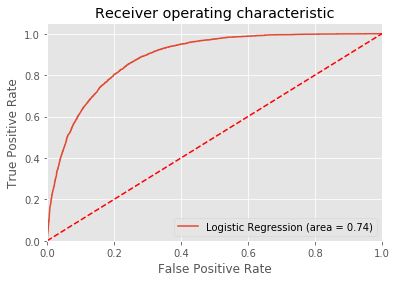

In [155]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y1, logreg.predict(X1))
fpr, tpr, thresholds = roc_curve(Y1, logreg.predict_proba(X1)[:,1])
auc = metrics.auc(fpr, tpr)
print(auc)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


C:\Users\Roopika Ganesh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Roopika Ganesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Roopika Ganesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of IT

LR: 0.835458 (0.005920)
CART: 0.781864 (0.005130)


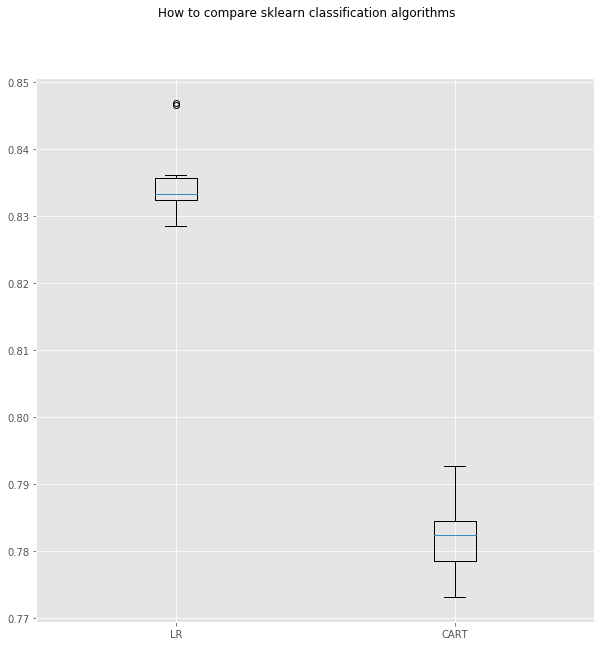

In [156]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
plt.style.use('ggplot')
seed = 50

kfold = model_selection.KFold(n_splits=10, random_state=seed)
    
    # preparing models
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, train_X, train_Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    # boxplot algorithm comparison
fig = plt.figure(figsize=(10,10))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [157]:
#precision
pr = tp/(tp+fp)
print(pr)

0.6888178913738019


In [158]:
#recall
re = tp/(tp+fn)
print(re)

0.5605824232969319


In [159]:
#fmeasure 
fm = (2 * pr * re)/(pr + re)
print(fm)

0.6181192660550459
